# S&P Comparison Plot
This notebook will grab the last year of pricing data for a stock, calculate cumulative percent returns, and subtract out the cumulative percent returns of the S&P, plotting the results.

### Notes
1. The data from Tradier's sandbox is delayed by up to a day. This should not be used for making actual investment decisions.
2. The price used is the daily price at close. There may be intra-day opportunities diguised by this.

### Requirements
You must sign up for a developer account at Tradier to use the API

### Usage:
```
SYMBOL = "AAPL"

returns, index, diffs = compare_sp(SYMBOL)
plot_returns(returns, index, diffs)
```

In [1]:
TRADIER_API_TOKEN = #SIGN UP AT DEVELOPER.TRADIER.COM

In [2]:
import arrow
import requests
from matplotlib import pyplot as plt


In [3]:
# API Calls
def make_call(url, params):
    url = "https://sandbox.tradier.com/v1/%s" % url
    headers = {"Authorization": "Bearer %s" % TRADIER_API_TOKEN, "Accept": "application/json"}
    resp = requests.get(url, params=params, headers=headers)
    return resp.json()

def get_last_year(symbol):
    params = {
        "symbol": symbol,
        "interval": "daily",
        "start": arrow.utcnow().shift(years=-1).format("YYYY-MM-DD"),
        "end": arrow.utcnow().format("YYYY-MM-DD"),
    }
    return make_call("markets/history", params)["history"]["day"]

In [4]:
# Math
def get_pcts(quotes):
    pcts = []
    prev = quotes[0]["close"]
    for i in range(0, len(quotes)):
        curr = float(quotes[i]["close"])
        pct = (curr - prev) / prev
        pcts.append(pct)
        prev = curr
    return pcts

def get_cumulative_return(pcts):
    cumulative = [0,]
    for i in range(1, len(pcts)):
        cumulative.append(pcts[i] + cumulative[i-1])
    return cumulative

def get_returns(symbol):
    return get_cumulative_return(get_pcts(get_last_year(symbol)))

def get_sp_returns():
    return get_returns("VOO")

def subtract(returns, index):
    if len(returns) != len(index):
        return "Can't compare unequal lists"
    return [returns[i] - index[i] for i in range(len(returns))]

In [5]:
# User calls
def compare_sp(symbol):
    returns = get_returns(symbol)
    index = get_sp_returns()
    return returns, index, subtract(returns, index)

def plot_returns(returns, index, diffs):
    plt.rcParams['figure.figsize'] = [8, 6]
    x = list(range(len(returns)))
    plt.plot(x, returns, label = "Symbol returns", lw=.5)
    plt.plot(x, index, label = "Index returns", lw=.5)
    plt.plot(x, diffs, label = "Returns over index", lw=2)
    plt.legend()
    plt.grid()
    plt.show()

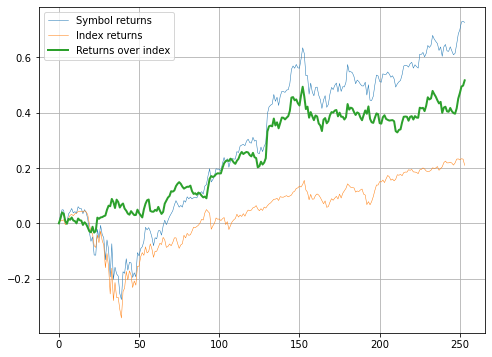

In [6]:
SYMBOL = "AAPL"

returns, index, diffs = compare_sp(SYMBOL)
plot_returns(returns, index, diffs)